In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Data Prep and Imputation of Missing Data

In [50]:
# Import the three data sets and concatenate them
changping = pd.read_csv('/Users/Rocco/UCLA/Stats 131/Final Project/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
changping = changping.iloc[:,1:]
dongsi = pd.read_csv('/Users/Rocco/UCLA/Stats 131/Final Project/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
dongsi = dongsi.iloc[:,1:]
huairou = pd.read_csv('/Users/Rocco/UCLA/Stats 131/Final Project/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
huairou = huairou.iloc[:,1:]
data = pd.concat([changping, dongsi, huairou], axis = 0)

In [51]:
# Create a "date" column of the form of YYYY-MM-DD HH:MM:SS"
date = pd.to_datetime({"year":data.year,"month":data.month,"day":data.day,"hour":data.hour})
data['date'] = date

In [52]:
# Reindex
data = data.reset_index(drop=True)

In [53]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00


In [54]:
data.tail()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
105187,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou,2017-02-28 19:00:00
105188,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou,2017-02-28 20:00:00
105189,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou,2017-02-28 21:00:00
105190,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou,2017-02-28 22:00:00
105191,2017,2,28,23,11.0,20.0,2.0,27.0,400.0,77.0,6.7,1009.3,-13.6,0.0,NE,1.9,Huairou,2017-02-28 23:00:00


In [55]:
# to see if has na values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
year       105192 non-null int64
month      105192 non-null int64
day        105192 non-null int64
hour       105192 non-null int64
PM2.5      102715 non-null float64
PM10       103280 non-null float64
SO2        102921 non-null float64
NO2        101285 non-null float64
CO         99052 non-null float64
O3         102773 non-null float64
TEMP       105068 non-null float64
PRES       105069 non-null float64
DEWP       105066 non-null float64
RAIN       105066 non-null float64
wd         104672 non-null object
WSPM       105086 non-null float64
station    105192 non-null object
date       105192 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(4), object(2)
memory usage: 14.4+ MB


In [56]:
# export the merged csv file (before removing na) for future use
data.to_csv("data(hasna).csv",index = False)

In [57]:
# create a list that contains the column name where has na
nanlistname = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']

In [58]:
# define a function that cleans na
# input a column and replace na with the mean of the its two nearest neighbour
def fillna(columns):
    for c in columns:
        a = c.notnull()
        for i in range(0, data.shape[0]):
            #print(a[i])
            if a[i]==False:
                for k in range(i,data.shape[0]):
                    if a[k]==True:
                        c[i] = (c[i-1] + c[k])/2
                        break

In [59]:
# fill na for 'wd' using previous non-na value
data['wd'].fillna(method = 'ffill',inplace = True )

In [60]:
# fill na for the other columns that contain na
fillna([data['SO2'],data['PM2.5'],data['PM10'],data['CO'],data['NO2'],data['O3'],data['DEWP'],data['TEMP'],data['PRES'],data['WSPM'],data['RAIN']])

/Users/Rocco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [61]:
# check if na's have been filled up
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
year       105192 non-null int64
month      105192 non-null int64
day        105192 non-null int64
hour       105192 non-null int64
PM2.5      105192 non-null float64
PM10       105192 non-null float64
SO2        105192 non-null float64
NO2        105192 non-null float64
CO         105192 non-null float64
O3         105192 non-null float64
TEMP       105192 non-null float64
PRES       105192 non-null float64
DEWP       105192 non-null float64
RAIN       105192 non-null float64
wd         105192 non-null object
WSPM       105192 non-null float64
station    105192 non-null object
date       105192 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(4), object(2)
memory usage: 14.4+ MB


In [62]:
# export the non na csv file
data.to_csv("data(nona).csv",index = False)

### Now we have done the imputation of Missing Data. 
### Starting from here, we should just import the data(nona).csv file everytime we launch the notebook!

In [146]:
# Import the no-na data file
data = pd.read_csv('/Users/Rocco/UCLA/Stats 131/Final Project/data(nona).csv')

In [147]:
# Set a multi index
data = data.set_index(['station','date'])

In [148]:
data.head()

year  month  day  hour  PM2.5  PM10   SO2  \
station   date                                                             
Changping 2013-03-01 00:00:00  2013      3    1     0    3.0   6.0  13.0   
          2013-03-01 01:00:00  2013      3    1     1    3.0   3.0   6.0   
          2013-03-01 02:00:00  2013      3    1     2    3.0   3.0  22.0   
          2013-03-01 03:00:00  2013      3    1     3    3.0   6.0  12.0   
          2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  14.0   

                                NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
station   date                                                               
Changping 2013-03-01 00:00:00   7.0  300.0  85.0  -2.3  1020.8 -19.7   0.0   
          2013-03-01 01:00:00   6.0  300.0  85.0  -2.5  1021.3 -19.0   0.0   
          2013-03-01 02:00:00  13.0  400.0  74.0  -3.0  1021.3 -19.9   0.0   
          2013-03-01 03:00:00   8.0  300.0  81.0  -3.6  1021.8 -19.1   0.0   
          2013-03-01 04:00:00   8.0  300.0  81.0  -3.5  1022.3 -19.4   0.0   

                                wd  WSPM  
station   date                            
Changping 2013-03-01 00:00:00    E   0.5  
          2013-03-01 01:00:00  ENE   0.7  
          2013-03-01 02:00:00  ENE   0.2  
          2013-03-01 03:00:00  NNE   1.0  
          2013-03-01 04:00:00    N   2.1

In [66]:
data.tail()

year  month  day  hour  PM2.5  PM10  SO2   NO2  \
station date                                                                  
Huairou 2017-02-28 19:00:00  2017      2   28    19   16.0  28.0  2.0  19.0   
        2017-02-28 20:00:00  2017      2   28    20   21.0  34.0  4.0  24.0   
        2017-02-28 21:00:00  2017      2   28    21   17.0  33.0  2.0  39.0   
        2017-02-28 22:00:00  2017      2   28    22   11.0  29.0  3.0  32.0   
        2017-02-28 23:00:00  2017      2   28    23   11.0  20.0  2.0  27.0   

                                 CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  
station date                                                                    
Huairou 2017-02-28 19:00:00   300.0  95.0   9.9  1008.6 -14.1   0.0  WNW   1.8  
        2017-02-28 20:00:00   500.0  80.0   9.5  1008.9 -14.4   0.0  SSW   1.3  
        2017-02-28 21:00:00   900.0  60.0   8.4  1009.3 -14.6   0.0   SE   1.5  
        2017-02-28 22:00:00  1400.0  69.0   8.3  1009.5 -14.7   0.0  ENE   3.2  
        2017-02-28 23:00:00   400.0  77.0   6.7  1009.3 -13.6   0.0   NE   1.9

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 105192 entries, (Changping, 2013-03-01 00:00:00) to (Huairou, 2017-02-28 23:00:00)
Data columns (total 16 columns):
year     105192 non-null int64
month    105192 non-null int64
day      105192 non-null int64
hour     105192 non-null int64
PM2.5    105192 non-null float64
PM10     105192 non-null float64
SO2      105192 non-null float64
NO2      105192 non-null float64
CO       105192 non-null float64
O3       105192 non-null float64
TEMP     105192 non-null float64
PRES     105192 non-null float64
DEWP     105192 non-null float64
RAIN     105192 non-null float64
wd       105192 non-null object
WSPM     105192 non-null float64
dtypes: float64(11), int64(4), object(1)
memory usage: 13.6+ MB


In [68]:
# select via the outer index to check the data structure
data.loc['Changping']

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,33.0,11.7,1008.9,-13.3,0.0,NNE,1.3
2017-02-28 20:00:00,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1
2017-02-28 21:00:00,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5


In [69]:
# check the other two and see if they have the same shape as "Changping"
print(data.loc['Dongsi'].shape)
print(data.loc['Huairou'].shape)

(35064, 16)
(35064, 16)


In [70]:
# select via the ounner then inner index
data.loc[('Huairou', '2017-01-01 00:00:00'):('Huairou', '2017-01-31 23:00:00')]

year  month  day  hour  PM2.5   PM10   SO2  \
station date                                                              
Huairou 2017-01-01 00:00:00  2017      1    1     0  324.0  378.0   6.0   
        2017-01-01 01:00:00  2017      1    1     1  279.0  345.0   5.0   
        2017-01-01 02:00:00  2017      1    1     2  226.0  280.0   4.0   
        2017-01-01 03:00:00  2017      1    1     3  255.0  314.0   3.0   
        2017-01-01 04:00:00  2017      1    1     4  319.0  337.0   3.0   
...                           ...    ...  ...   ...    ...    ...   ...   
        2017-01-31 19:00:00  2017      1   31    19   81.0  104.0  24.0   
        2017-01-31 20:00:00  2017      1   31    20   97.0  118.0  20.0   
        2017-01-31 21:00:00  2017      1   31    21   73.0  101.0  15.0   
        2017-01-31 22:00:00  2017      1   31    22   24.0   38.0   5.0   
        2017-01-31 23:00:00  2017      1   31    23   25.0   51.0   7.0   

                               NO2      CO    O3  TEMP    PRES  DEWP  RAIN  \
station date                                                                 
Huairou 2017-01-01 00:00:00  116.0  5000.0   2.0  -5.5  1016.9  -9.9   0.0   
        2017-01-01 01:00:00   92.0  4700.0   2.0  -6.5  1016.7 -10.0   0.0   
        2017-01-01 02:00:00   69.0  3100.0   2.0  -7.0  1017.2  -9.9   0.0   
        2017-01-01 03:00:00   76.0  3900.0   2.0  -7.5  1017.3  -9.7   0.0   
        2017-01-01 04:00:00   87.0  5400.0  28.0  -8.3  1016.5  -9.5   0.0   
...                            ...     ...   ...   ...     ...   ...   ...   
        2017-01-31 19:00:00   52.0  1500.0  35.0  -2.4  1019.0 -20.8   0.0   
        2017-01-31 20:00:00   58.0  1600.0  21.0  -1.4  1020.1 -22.7   0.0   
        2017-01-31 21:00:00   63.0  1300.0  11.0  -2.7  1021.2 -21.0   0.0   
        2017-01-31 22:00:00   20.0   600.0  62.0  -2.6  1022.3 -21.4   0.0   
        2017-01-31 23:00:00   33.0   900.0  41.0  -1.9  1023.5 -21.4   0.0   

                              wd  WSPM  
station date                            
Huairou 2017-01-01 00:00:00   NW   1.5  
        2017-01-01 01:00:00  WNW   1.5  
        2017-01-01 02:00:00   NW   0.9  
        2017-01-01 03:00:00    N   0.8  
        2017-01-01 04:00:00  SSE   1.7  
...                          ...   ...  
        2017-01-31 19:00:00   NW   2.2  
        2017-01-31 20:00:00    E   1.4  
        2017-01-31 21:00:00  WSW   0.7  
        2017-01-31 22:00:00    S   1.0  
        2017-01-31 23:00:00  NNE   1.6  

[744 rows x 16 columns]

In [71]:
# define a dictionary for season
s = {
1: 'Winter',
2: 'Winter',
3: 'Spring',
4: 'Spring',
5: 'Spring',
6: 'Summer',
7: 'Summer',
8: 'Summer',
9: 'Fall',
10: 'Fall',
11: 'Fall',
12: 'Winter'}

In [72]:
# add 'season' column that indicates season
data["season"]=[s.get(value) for value in data.month]

In [73]:
data.head()

year  month  day  hour  PM2.5  PM10   SO2  \
station   date                                                             
Changping 2013-03-01 00:00:00  2013      3    1     0    3.0   6.0  13.0   
          2013-03-01 01:00:00  2013      3    1     1    3.0   3.0   6.0   
          2013-03-01 02:00:00  2013      3    1     2    3.0   3.0  22.0   
          2013-03-01 03:00:00  2013      3    1     3    3.0   6.0  12.0   
          2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  14.0   

                                NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
station   date                                                               
Changping 2013-03-01 00:00:00   7.0  300.0  85.0  -2.3  1020.8 -19.7   0.0   
          2013-03-01 01:00:00   6.0  300.0  85.0  -2.5  1021.3 -19.0   0.0   
          2013-03-01 02:00:00  13.0  400.0  74.0  -3.0  1021.3 -19.9   0.0   
          2013-03-01 03:00:00   8.0  300.0  81.0  -3.6  1021.8 -19.1   0.0   
          2013-03-01 04:00:00   8.0  300.0  81.0  -3.5  1022.3 -19.4   0.0   

                                wd  WSPM  season  
station   date                                    
Changping 2013-03-01 00:00:00    E   0.5  Spring  
          2013-03-01 01:00:00  ENE   0.7  Spring  
          2013-03-01 02:00:00  ENE   0.2  Spring  
          2013-03-01 03:00:00  NNE   1.0  Spring  
          2013-03-01 04:00:00    N   2.1  Spring

In [94]:
# Find seasonal mean of 'PM2.5' for each station in each year
seasonmean = data.groupby(["station","year","season"]).mean()[["PM2.5"]].unstack()
seasonmean

PM2.5                                  
season               Fall     Spring     Summer      Winter
station   year                                             
Changping 2013  72.303571  80.655344  65.964624   67.145161
          2014  85.599124  80.520652  59.997652   93.361905
          2015  57.959657  64.533047  51.061821  101.340380
          2016  70.250344  60.327729  48.083758   68.372539
          2017        NaN        NaN        NaN   79.811441
Dongsi    2013  90.847985  88.608582  81.326285   85.681452
          2014  89.077953  84.381692  75.524434  102.507757
          2015  86.430503  77.574649  61.578663  124.229213
          2016  87.081638  79.700449  64.255548   88.373512
          2017        NaN        NaN        NaN  102.071965
Huairou   2013  68.394918  72.830389  64.213315   57.686996
          2014  74.853911  75.157484  64.433316   93.043988
          2015  67.677470  69.569497  47.971213   96.575133
          2016  68.694598  62.889832  48.824332   63.322044
          2017        NaN        NaN        NaN   73.875353

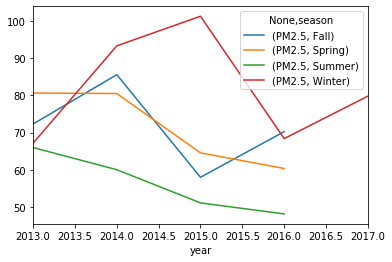

In [103]:
seasonmean.loc['Changping'].plot()

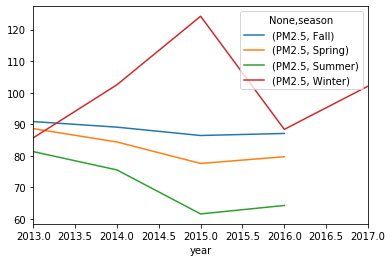

In [105]:
seasonmean.loc['Dongsi'].plot()

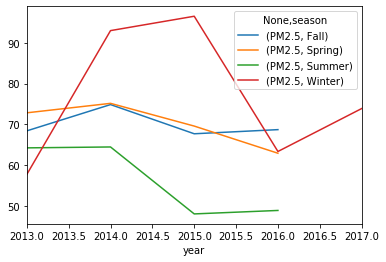

In [104]:
seasonmean.loc['Huairou'].plot()

update below by Rocco 11/23/2019:

In [163]:
# Find monthly mean of 'PM2.5' for each station in each year
monthlymean = data.groupby(["station","year","month"]).mean()[["PM2.5"]]
monthlymean

PM2.5
station   year month           
Changping 2013 3      98.916667
               4      59.382639
               5      82.980511
               6      81.052626
               7      61.977151
...                         ...
Huairou   2016 10     78.157594
               11     82.927778
               12     91.258737
          2017 1      88.702285
               2      57.459821

[144 rows x 1 columns]

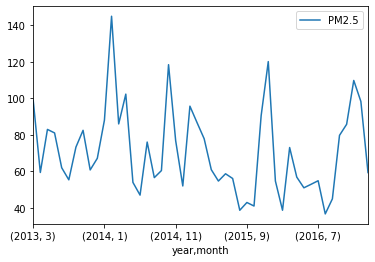

In [164]:
monthlymean.loc['Changping'].plot()

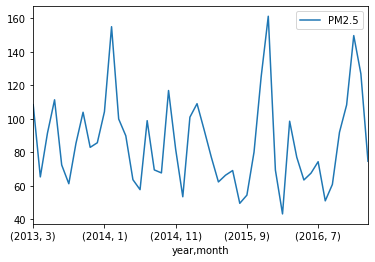

In [165]:
monthlymean.loc['Dongsi'].plot()

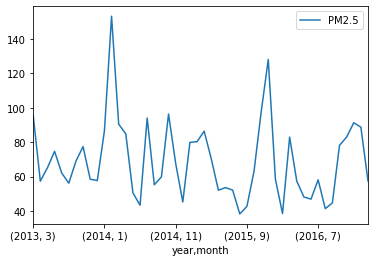

In [166]:
monthlymean.loc['Huairou'].plot()

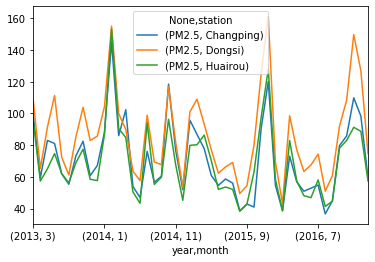

In [168]:
#combine three in one
data.groupby(["year","month","station"]).mean()[["PM2.5"]].unstack().plot()

station    season
Changping  Fall      AxesSubplot(0.125,0.125;0.775x0.755)
           Spring    AxesSubplot(0.125,0.125;0.775x0.755)
           Summer    AxesSubplot(0.125,0.125;0.775x0.755)
           Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Dongsi     Fall      AxesSubplot(0.125,0.125;0.775x0.755)
           Spring    AxesSubplot(0.125,0.125;0.775x0.755)
           Summer    AxesSubplot(0.125,0.125;0.775x0.755)
           Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Huairou    Fall      AxesSubplot(0.125,0.125;0.775x0.755)
           Spring    AxesSubplot(0.125,0.125;0.775x0.755)
           Summer    AxesSubplot(0.125,0.125;0.775x0.755)
           Winter    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

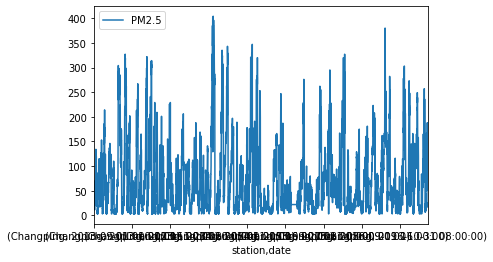

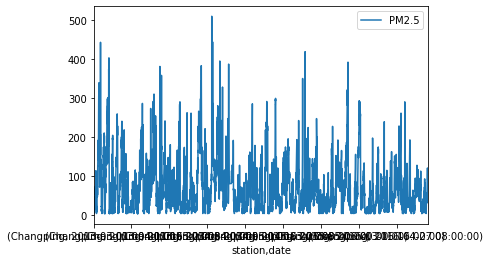

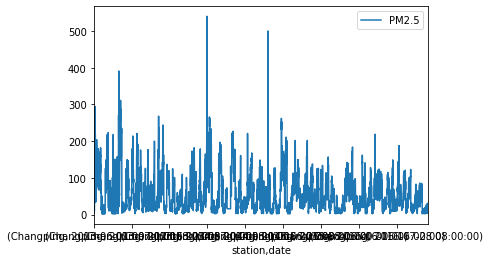

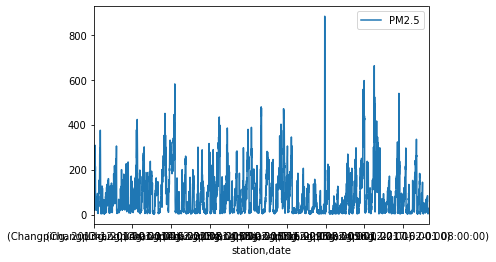

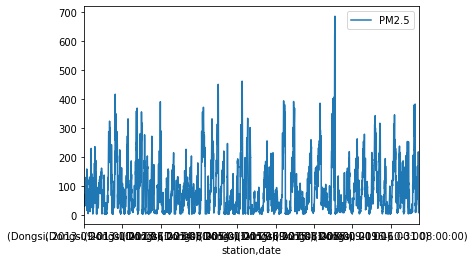

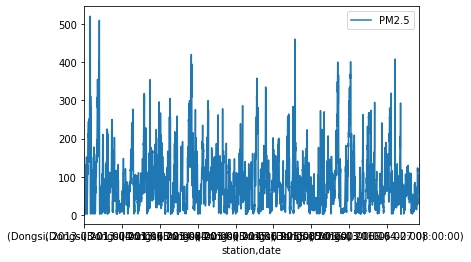

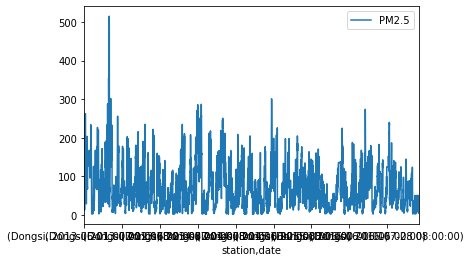

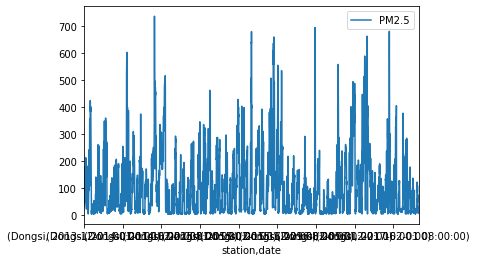

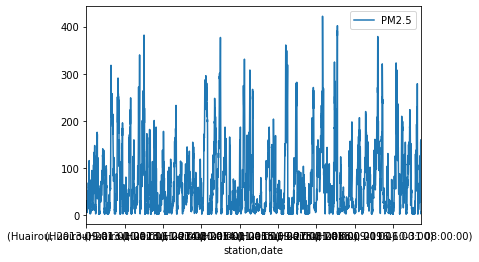

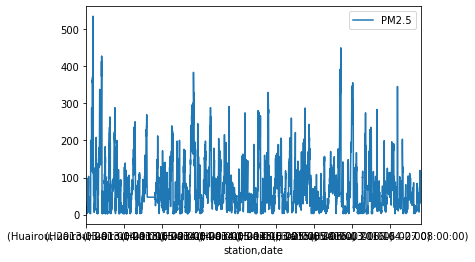

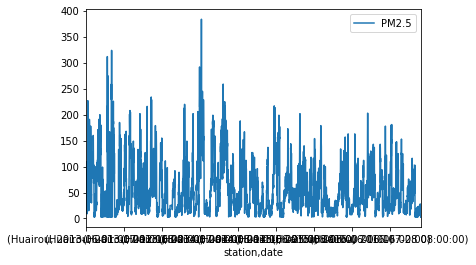

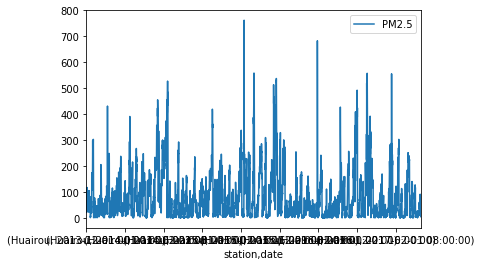

In [127]:
# The seasonal time series plot of 'PM2.5' for each station
data[['PM2.5','season']].groupby(['station','season']).plot()